Text(0.5, 1.0, 'PSD with lengh = 2000')

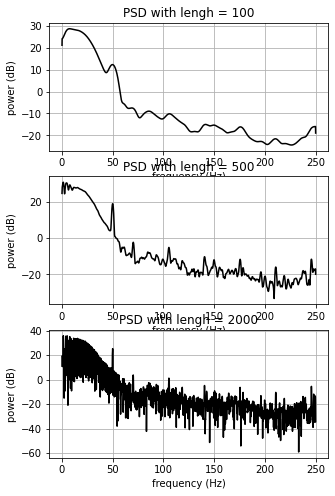

In [1]:
import numpy as np
import pylab as py
py.ion()
py.close('all')
import scipy.signal as sp

x = np.genfromtxt('ecg.dat')
fs = 500

"""
    Objective: Compare spectral estimation for different window lengths using
    welch estimation.

    Plot the log spectrum of the signal using windows of 100, 500, 2000.

    Q: Comment the results.
    Q: Which windows length is the most suitable for the observation of 50 Hz?
    Q: Why?
"""

f,X_100 = sp.welch(x, nperseg=100, nfft=4096, fs=fs)
f,X_500 = sp.welch(x, nperseg=500, nfft=4096, fs=fs)
f,X_2000 = sp.welch(x, nperseg=2000, nfft=4096, fs=fs)

py.figure(1, figsize=[5,8])
py.clf()
py.subplot(3,1,1)
py.plot(f, 10*np.log10(X_100), 'k')
py.grid()
py.xlabel('frequency (Hz)')
py.ylabel('power (dB)')
py.title('PSD with lengh = 100')

py.subplot(3,1,2)
py.plot(f, 10*np.log10(X_500), 'k')
py.grid()
py.xlabel('frequency (Hz)')
py.ylabel('power (dB)')
py.title('PSD with lengh = 500')

py.subplot(3,1,3)
py.plot(f, 10*np.log10(X_2000), 'k')
py.grid()
py.xlabel('frequency (Hz)')
py.ylabel('power (dB)')
py.title('PSD with lengh = 2000')

Q: Comment the results.

A: The three figures show the result of power spectral using different window length. We observe that there are large amount of signals having small frequency and we also notice that there is a 50 Hz signal showing up in all of three figures. With different window length, we have results different in smoothness and resolutions. To be specific, when window length is small, the result is smoother but has less resolution and vice versa.


Q: Which windows length is the most suitable for the observation of 50 Hz?

A: From the three figures, a windows length of 500 may be the most suitable one.


Q: Why?
 
A: Since windows length compromises between resolution and smoothness, we have to choose the best parameters so that we could have the best result to analyse. For the first figure, it clearly doesn't have enough resolution and the reduction of information. For the last figure, when we zoom in between 45 and 55, we observe clear oscillation indicating that there is too much noise. However, the second figure will give us both the perfect signal lineshape without too much noise as well as reasonable resolution keeping enough information. 

In [2]:
import pylab as py
import numpy as np

def plot_time(x, t, main_title=''):
    py.figure(figsize=[8,8])
    py.subplot(3,1,1)
    py.plot(t,x['rr'],'k')
    py.xlabel('time (s)')
    py.ylabel('interbeats (ms)')
    py.title('cardiac interbeat intervals')
    py.subplot(3,1,2)
    py.plot(t,x['bp'],'k')
    py.xlabel('time (s)')
    py.ylabel('mean blood pressure (mmHg)')
    py.title('mean blood pressure')
    py.subplot(3,1,3)
    py.plot(t,x['resp'],'k')
    py.xlabel('time (s)')
    py.ylabel('respiratory volume (a.u.)')
    py.title('respiratory volume')
    py.suptitle(main_title, fontsize=14)
    
def plot_rxx(x, main_title=''):
    K = np.arange(len(x['rxx_rr']))-len(x['rr'])+1
    py.figure(figsize=[8,8])
    py.subplot(3,1,1)
    py.plot(K,x['rxx_rr'],'k')
    py.xlabel('$k$')
    py.ylabel('power (ms$^2$)')
    py.title('cardiac interbeat intervals')
    py.subplot(3,1,2)
    py.plot(K,x['rxx_bp'],'k')
    py.xlabel('$k$')
    py.ylabel('power (mmHg$^2$)')
    py.title('mean blood pressure')
    py.subplot(3,1,3)
    py.plot(K,x['rxx_resp'],'k')
    py.xlabel('$k$')
    py.ylabel('power (a.u.)')
    py.title('respiratory volume')
    py.suptitle(main_title, fontsize=14)

def plot_X(x, fs, main_title=''):
    f = np.arange(len(x['RR']))/len(x['RR'])*fs
    py.figure(figsize=[8,8])
    py.subplot(3,1,1)
    py.plot(f,x['RR'],'k')
    py.xlabel('f (Hz)')
    py.ylabel('power (ms$^2$/Hz)')
    py.title('cardiac interbeat intervals')
    py.xlim(0,0.5)
    py.subplot(3,1,2)
    py.plot(f,x['BP'],'k')
    py.xlabel('frequency (Hz)')
    py.ylabel('power (mmHg$^2$/Hz)')
    py.title('mean blood pressure')
    py.xlim(0,0.5)
    py.subplot(3,1,3)
    py.plot(f,x['RESP'],'k')
    py.xlabel('frequency (Hz)')
    py.ylabel('power (a.u.)')
    py.title('respiratory volume')
    py.xlim(0,0.5)
    py.suptitle(main_title, fontsize=14)

def plot_XY(x, y, fs, main_title=''):
    f = np.arange(len(x['RR']))/len(x['RR'])*fs
    py.figure(figsize=[8,8])
    py.subplot(3,1,1)
    py.plot(f,x['RR'],'k', label='normal')
    py.plot(f,y['RR'],'r', label='alcool')
    py.xlabel('f (Hz)')
    py.ylabel('power (ms$^2$/Hz)')
    py.title('cardiac interbeat intervals')
    py.xlim(0,0.5)
    py.legend()
    py.subplot(3,1,2)
    py.plot(f,x['BP'],'k', label='normal')
    py.plot(f,y['BP'],'r', label='alcool')
    py.xlabel('frequency (Hz)')
    py.ylabel('power (mmHg$^2$/Hz)')
    py.title('mean blood pressure')
    py.xlim(0,0.5)
    py.legend()
    py.subplot(3,1,3)
    py.plot(f,x['RESP'],'k', label='normal')
    py.plot(f,y['RESP'],'r', label='alcool')
    py.xlabel('frequency (Hz)')
    py.ylabel('power (a.u.)')
    py.title('respiratory volume')
    py.xlim(0,0.5)
    py.legend()
    py.suptitle(main_title, fontsize=14)


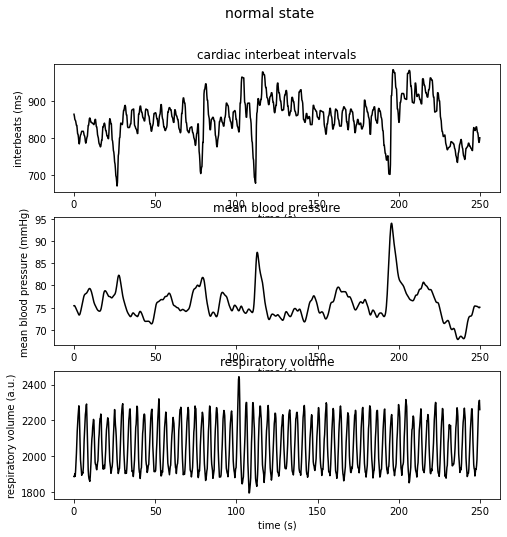

In [3]:
import numpy as np
import pylab as py
py.ion()
py.close('all')
import scipy.signal as sp
import m03_ex2_ext as my_plot

# Load signals of a subject at rest.
x = np.genfromtxt('heart_1.dat', delimiter='  ').T
x = {'rr':x[0], 'bp':x[1], 'resp':x[2]}
# Load signals of a subject after alcool consumption.
y = np.genfromtxt('heart_2.dat', delimiter='  ').T
y = {'rr':y[0], 'bp':y[1], 'resp':y[2]}
# Signals are sampled at 4 Hz.
fs = 4
# Generate the time for the recordings.
t = np.arange(len(x['rr']))/fs

"""
    Cardiac interbeats, mean blood pressure and respiration volume of a subject
    at rest.

    Q: Comment the different signals and their realtionships.
    Q: Which signals are related and how?

"""


my_plot.plot_time(x, t, 'normal state')

Q: Comment the different signals and their realtionships.  
A: Respiratory Volume Signal is more derterministic than other two signals. It looks like periodical signal. Cardiac Interbeat Intervals Signal is like a mix between random and deterministic signals. The same for Mean Blood Pressure Signal is the result of regulation of breathing and cardiac interbeat. There are some variations but overall, the signal is steady.  
Q: Which signals are related and how?   
A: Cardiac Interbeat Intervals signal and Respiratory Volume signal are related. The heart rate (HR) is coupled to the respiratory cycle: the HR increases during inspiration and decreases during expiration. Cardiac output falls, and consequently arterial pressure falls. The drop in arterial pressure reduces stretch on the arterial baroreceptors, causing a reflex increase in heart rate.

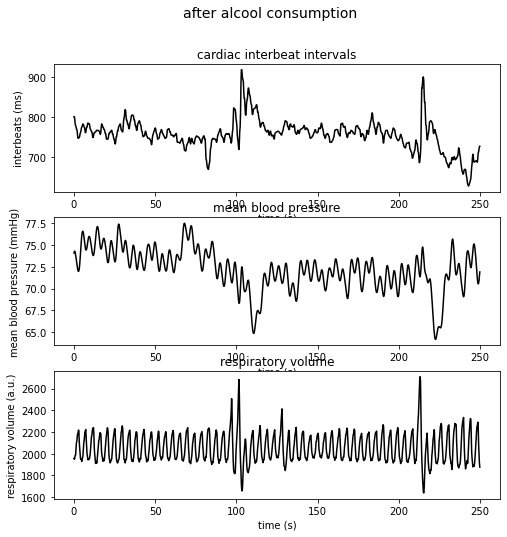

In [4]:
"""
    Cardiac interbeats, mean blood pressure and respiration volume of a subject
    after alcool consumption.

    Q: Comment the different signals and their realtionships.
    Q: Which signals are related and how?
    Q: What are the differences with rest recording of previous figure?

"""

my_plot.plot_time(y, t, 'after alcool consumption')


Q: Comment the different signals and their realtionships.  
A: We can observe there are irregular behaviours in three signals, mainly caused by mulfunction of brain after alcool. Cardiac Interbeat Intervals Signal are related to Respiratory Volume Signal, and Mean Blood Pressure Signal is after regulation but in this case, after alcool, the variations are more stronger.  
Q: Which signals are related and how?  
A: Cardiac Interbeat Intervals signal and Respiratory Volume signal are related. The heart rate (HR) is coupled to the respiratory cycle: the HR increases during inspiration and decreases during expiration. Cardiac output falls, and consequently arterial pressure falls. The drop in arterial pressure reduces stretch on the arterial baroreceptors, causing a reflex increase in heart rate.  
Q: What are the differences with rest recording of previous figure?  
A: There are some deep breaths after alcool and irregular cardiac interbeats compared with the previous figures. In mean blood pressure signal, there are strong viriations in the signal due to abnormal brain function or mulfunction of brain and regulation systerm after alcool.

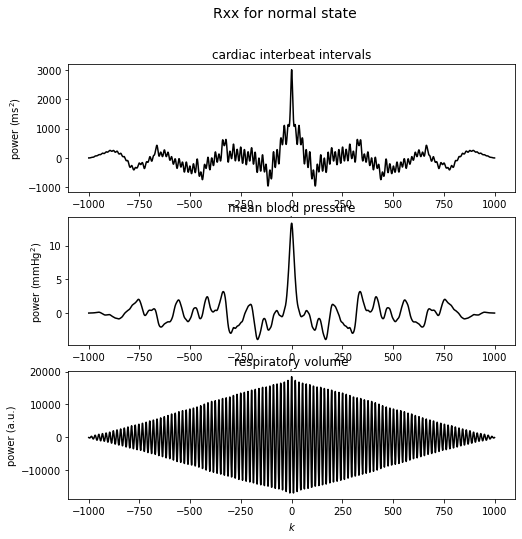

In [5]:

""" 
    Compute the intercorrelation of the signals of the subject at rest.

    Q: Comment the oscillation present in the different signals.
    Q: Which signals are related and how.

"""

def my_corr(x):
    rxx = np.correlate(x-np.mean(x), x-np.mean(x), mode='full')/len(x)
    return rxx

x['rxx_rr'] = my_corr(x['rr'])
x['rxx_bp'] = my_corr(x['bp'])
x['rxx_resp'] = my_corr(x['resp'])

my_plot.plot_rxx(x, 'Rxx for normal state')

Q: Comment the oscillation present in the different signals.  
A: The oscillations in cardiac interbeat intervals and mean blood pressure are more random-like because they decrease very fast like Gaussian white noise. The oscillation in respiratory volume decays slower and more deterministic-like. The oscillation in cardiac interbeat intervals is stronger than that of mean blood pressure.    
Q: Which signals are related and how.  
A: Cardiac Interbeat Intervals signal and Respiratory Volume signal are related. The heart rate (HR) is coupled to the respiratory cycle: the HR increases during inspiration and decreases during expiration. Cardiac output falls, and consequently arterial pressure falls. The drop in arterial pressure reduces stretch on the arterial baroreceptors, causing a reflex increase in heart rate. Q: What are the differences with rest recording of previous figure?

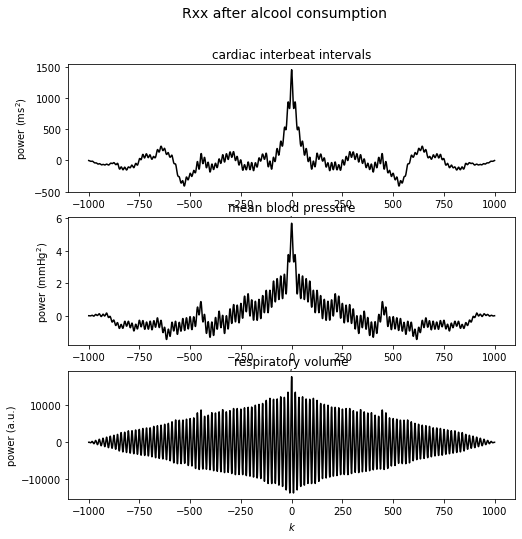

In [6]:
""" 
    Compute the intercorrelation of the signals of the subject after alcool
    consumption.

    Q: Comment the oscillation present in the different signals.
    Q: Which signals are related and how.
    Q: What difference do you observe with the previous figure?

"""

y['rxx_rr'] = my_corr(y['rr'])
y['rxx_bp'] = my_corr(y['bp'])
y['rxx_resp'] = my_corr(y['resp'])

my_plot.plot_rxx(y, 'Rxx after alcool consumption')

**Q: Comment the oscillation present in the different signals.**    
A: The oscillation in the first signal is weaker, and oscillation in the second signal is stronger. There are some irregular oscillation in the third signal. The oscillation in the first signal is weaker, and oscillation in the second signal is stronger, compared with previous figures. There are some irregular oscillation in the third signal.   Also, the mean blood pressure signal has some high quency components that are similar with that of respiration volume signal.  
Q: Which signals are related and how.  
A: Cardiac Interbeat Intervals signal and Respiratory Volume signal are related. The heart rate (HR) is coupled to the respiratory cycle: the HR increases during inspiration and decreases during expiration. Cardiac output falls, and consequently arterial pressure falls. The drop in arterial pressure reduces stretch on the arterial baroreceptors, causing a reflex increase in heart rate.  
Q: What difference do you observe with the previous figure?  
A:  The oscillation in the first signal is weaker, and oscillation in the second signal is stronger, compared with previous figures. There are some irregular oscillation in the third signal.  Also, the oscillation in the second signal decays slower after alcool, and is more deterministic-like than that of before alcool.

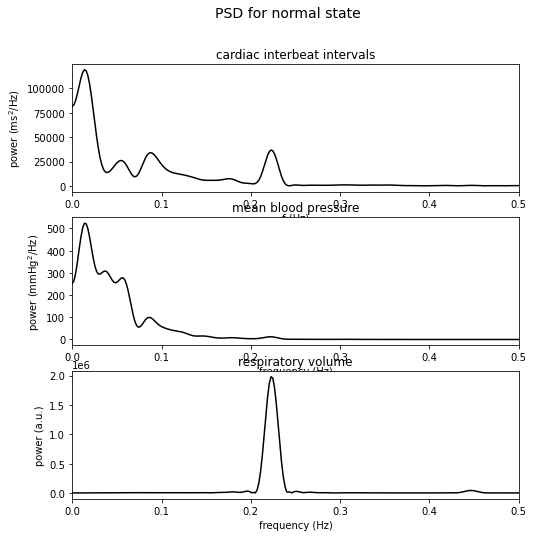

In [7]:
""" 
    Compute the PSD of the signal for the subject at rest.

    Q: How the different peaks are related to the control of the autonomic
        nervous system?
    Q: Do the positions and amplitude of the peaks confirm you previous
        findings;

"""

def my_psd(x, half_win=250):
    interval = np.arange(-half_win,half_win+1)+len(x)//2
    x_sub = x[interval]
    psd = np.abs(np.fft.fft(sp.hann(len(interval))*x_sub, 2048))
    return psd

x['RR'] = my_psd(x['rxx_rr'])
x['BP'] = my_psd(x['rxx_bp'])
x['RESP'] = my_psd(x['rxx_resp'])

my_plot.plot_X(x, fs, 'PSD for normal state')



**Q: How the different peaks are related to the control of the autonomic nervous system?**  
A: The peaks in tge low  frequency band is caused by baroreflex regulation. The peaks in high frequency are caused by sinus arrhythmia. The regulation system could modulate the effect caused by breathing, and there is no result in mean blood pressure.   
Q: Do the positions and amplitude of the peaks confirm you previous findings;  
A: Yes  

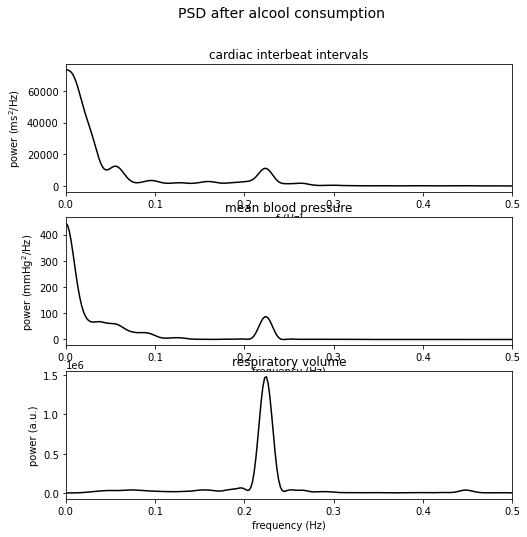

In [8]:
""" 
    Compute the PSD of the signal for the subject after alcool consumption.

    Q: How the different peaks are related to the control of the autonomic
        nervous system?
    Q: Do the positions and amplitude of the peaks confirm you previous
        findings;

"""

y['RR'] = my_psd(y['rxx_rr'])
y['BP'] = my_psd(y['rxx_bp'])
y['RESP'] = my_psd(y['rxx_resp'])

my_plot.plot_X(y, fs, 'PSD after alcool consumption')



**Q: How the different peaks are related to the control of the autonomic nervous system?**  
A: The peaks in tge low  frequency band is caused by baroreflex regulation. The peaks in high frequency are caused by sinus arrhythmia. The regulation system could not modulate the effect caused by breathing, and the result can be obtained in mean blood pressure.  
Q: Do the positions and amplitude of the peaks confirm you previous findings;  
A: yes.

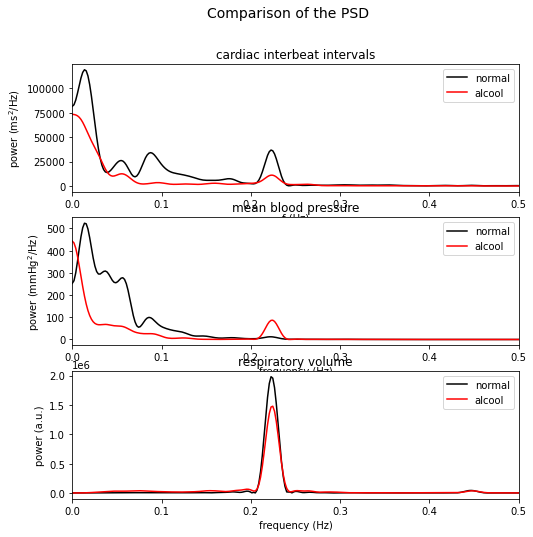

In [9]:
"""
    Plot the PSDs of the signals for the two conditions.

    Q: Discuss the differences.

"""

my_plot.plot_XY(x, y, fs, 'Comparison of the PSD')

**Q: Discuss the differences.  **
A: The amplititude of baroreflex regulation in the low frequency is much lower after alcool. The amplitudes of sinus arrhythmia in the high frequency are also lower in the respiratory volume signal and cardiac interbeat intervals signal. As a result, we can see mean blood pressure is dominated by the sinus arrhythmia and has an increasing of amplitude  in the high frequency band. 

(210.0, 215.0)

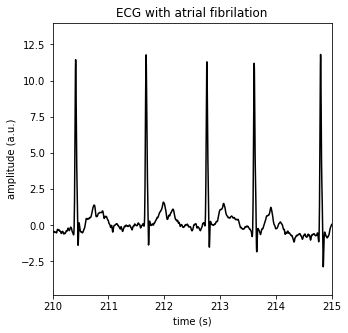

In [10]:
import numpy as np
import pylab as py
py.ion()
py.close('all')
import scipy.signal as sp

"""
    The first signal is an ECG with atrial fibrilation.

    Q: What are the differences of this ECG with a normal ECG?

"""

ecg = np.genfromtxt('ecg_af.dat')
ecg_fs = 300
t_ecg = np.arange(len(ecg))/ecg_fs

py.figure(1,figsize=[5,5])
py.plot(t_ecg, ecg, 'k')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG with atrial fibrilation')
py.xlim(210, 215)

Q: What are the differences of this ECG with a normal ECG?

A: Compared with a normal ECG, we observe there are some irregular oscillations and there are no clear signs of P peaks. 


(-500.0, 500.0)

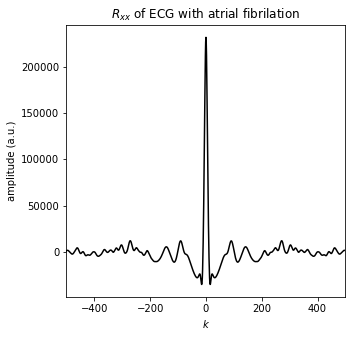

In [11]:
"""
    We compute the autocorelation of the ECG signal.

    In order to dircard the modulation of the baseline we first apply a
    high-pass filter with a cut-off frequency of 0.5 Hz.

    Q: Do you see a specific pattern that permits to characterize the atrial
        fibrilation?

"""

b, a = sp.butter(2, 0.5/ecg_fs*2, btype='high')

ecg_hp = sp.filtfilt(b, a, ecg)

rxx_ecg = np.correlate(ecg_hp, ecg_hp, mode='full') 
k = np.arange(len(rxx_ecg))-len(rxx_ecg)//2

py.figure(2,figsize=[5,5])
py.plot(k, rxx_ecg, 'k')
py.xlabel('$k$')
py.ylabel('amplitude (a.u.)')
py.title('$R_{xx}$ of ECG with atrial fibrilation')
py.xlim(-500, 500)

Q: Do you see a specific pattern that permits to characterize the atrial
        fibrilation?          
A: Normally, the autocorrelation function for ECG has more peaks equally distributing along side the center peak due to the reason that hearts pumps regularly which will give us peaks in different frequency. However, what we observe in this figure shows that there is only noise apart from the center peak indicating that the ECG signal is less regular. Therefore, we could use the peak of autocorrelation function to characterize whether a ECG signal is normal or not

(0.0, 60.0)

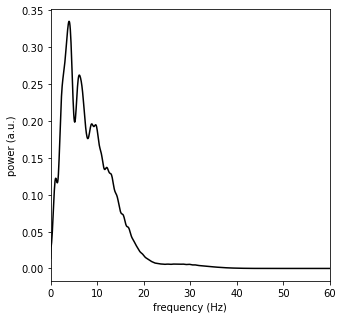

In [12]:

"""
    Compute the PSD of the ECG signal.

    Q: What do you see?

"""

f, ECG = sp.welch(ecg_hp, nperseg=500, nfft=4096, noverlap=250, fs=ecg_fs)

py.figure(3, figsize=[5,5])
py.clf()
py.plot(f, ECG, 'k')
py.xlabel('frequency (Hz)')
py.ylabel('power (a.u.)')
py.xlim(0,60)


**Q: What do you see?**    
A: We observe several peaks distributing within the low frequency regime.

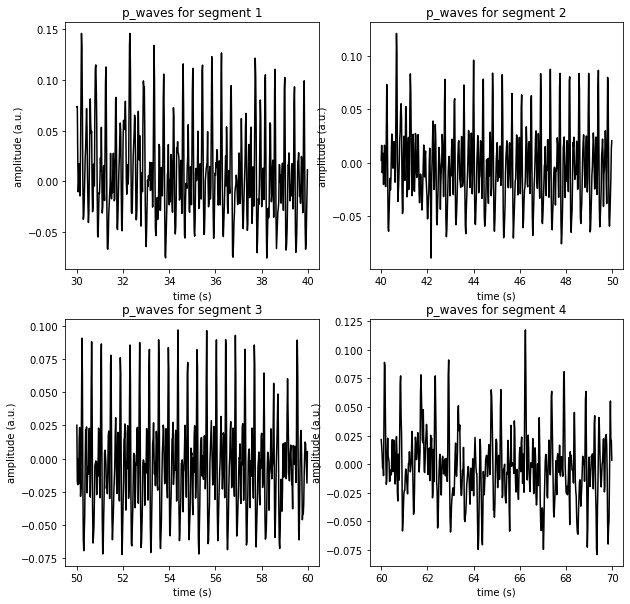

In [13]:

"""
    In order to higlight the signal related to the repolarisation of the
    atria and ECG signal with atrial fibrilation has been process, keeping only
    the P wave (repolarisation of the atria) and the QRST waves have been
    removed.

    During the measurement 4 time segments exhibit different behaviors.

    Q: What are the difference between the different segments ?

"""

p_wave = np.genfromtxt('AF_sync.dat')
p_wave_fs = 50
t_p_wave = np.arange(len(p_wave))/p_wave_fs

segments = [1500, 2000, 2500, 3000, 3500]


py.figure(4,figsize=[10,10])
for n in range(len(segments)-1):
    py.subplot(2, 2, int(n+1))
    idx = np.arange(segments[n], segments[n+1])
    py.plot(t_p_wave[idx], p_wave[idx], 'k')
    py.xlabel('time (s)')
    py.ylabel('amplitude (a.u.)')
    py.title('p_waves for segment '+str(n+1))

**Q: What are the difference between the different segments ?  **
A: They have different peaks and different frequencies and they hardly overlap.

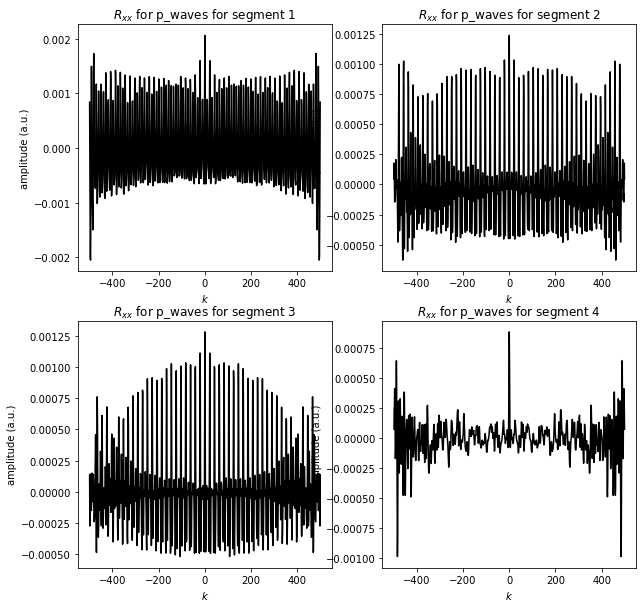

In [14]:
"""
    We compute the autocorelation of the p_wave signal.

    In order to dircard the modulation of the baseline we first apply a
    high-pass filter with a cut-off frequency of 0.5 Hz.
    

    Q: Do you see a specific pattern that permits to characterize the atrial
        fibrilation?
    Q: Discuss the organisation of the signals. Which one is the more organised,
        which one is closer to a noise?

"""



py.figure(5,figsize=[10,10])
for n in range(len(segments)-1):
    py.subplot(2, 2, int(n+1))
    idx = np.arange(segments[n], segments[n+1])
    rxx_p_wave = np.correlate(p_wave[idx], p_wave[idx], mode='full') 
    rxx_p_wave /= np.correlate(np.ones(len(idx)), np.ones(len(idx)), mode='full')
    k = np.arange(len(rxx_p_wave))-len(rxx_p_wave)//2
    py.plot(k, rxx_p_wave, 'k')
    py.xlabel('$k$')
    py.ylabel('amplitude (a.u.)')
    py.title('$R_{xx}$ for p_waves for segment '+str(n+1))

 Q: Do you see a specific pattern that permits to characterize the atrial
        fibrilation?  
A: There are two types of AF that can be observed. Segment 1 - 3 shows rythmical and oscillating fibrillations. Which are produced by self excitation-loops in the atrium. Segment 4 shows a very noisy pattern that results from random-like fibrillations which have no oscillating property.          
Q: Discuss the organisation of the signals. Which one is the more organised,
        which one is closer to a noise?  
A: Segment 4 is very noisy and has therfore a faster decay than other segments. While segment 1 and 2 show signal with stable frequency and less amplitude decay. And segment 3 also shows signal with stable frequency but the amplitude decays faster. In addition, segment 1 shows some noise.

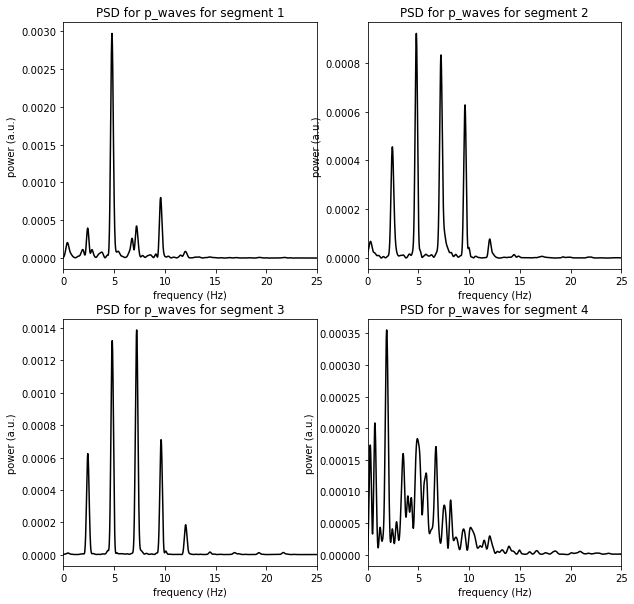

In [15]:
"""
    Compute the PSD of the p_wave signal.

    Q: What do you see?
    Q: Which one is the more organised?
    Q: Which ones looks like a noise?
    Q: Which ones exhibit a sustained repolarisation loop?

"""


py.figure(7, figsize=[10,10])
for n in range(len(segments)-1):
    idx = np.arange(segments[n], segments[n+1])
    f, P_WAVE = sp.welch(p_wave[idx], nperseg=250, nfft=4096, noverlap=100, fs=p_wave_fs)
    py.subplot(2, 2, int(n+1))
    py.plot(f, P_WAVE, 'k')
    py.xlabel('frequency (Hz)')
    py.ylabel('power (a.u.)')
    py.xlim(0,25)
    py.title('PSD for p_waves for segment '+str(n+1))

Q: What do you see?  
A: The PSD for four segments are different. And we observe that for some of them, there are several peaks around 2.5Hz, 5Hz, 7.5Hz, 10Hz and so on indicating that the original signal has the frequency of them.  
Q: Which one is the more organised?   Q: Which ones looks like a noise?   
A: The second and the third segment is more organized while the first and the fourth one are more like some random noise.  
Q: Which ones exhibit a sustained repolarisation loop?  
A: Segment 2 and 3 shows a very clear PSD which indicates that they exhibit a sustained repolarisation loop. 